<h1>K Nearest Neighbors </h1>
Here, we will have a look at the K Nearest Neighbors classifier from sklearn.neighbors module. In KNN, the classes are assigned to each entry based on the classes of the entries near it.

In [85]:
import numpy as np 
import pandas as pd 


<h2>Reading the dataset</h2>
<p>
The dataset we are working with is a telephone customer dataset. It consists of the customers of a telecomunication company which categorises its customer plans as described below(custcat) based on the region in which they live, their income, age, marital status:
</p>
<ol>
  <li> Basic Service</li>
  <li> E-Service</li>
  <li> Plus Service</li>
  <li> Total Service</li>
</ol>
<p>
Here, we will create a classifier to predict which plan might be selected by a class of unknown cases by considering the region, age, income, etc
</p>

In [86]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Lets have a look the number of customers in various categories.

In [87]:
import seaborn as sns 
df['custcat'].value_counts()


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

The graph below shows the income distribution of various entries in the dataset. We observe that most of the customers are from lower income range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002700D79BA88>]],
      dtype=object)

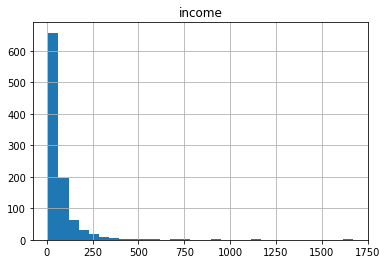

In [88]:
df.hist(column='income', bins=30)

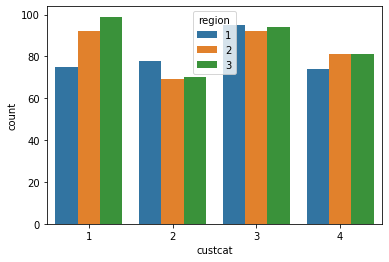

In [89]:
sns.countplot(data = df, x = 'custcat', hue='region')

Now, we initiate the features and the target variables, X and y.

In [46]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [47]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

<h2>Preprocessing</h2>
Here, we will scale all the feature values down to the range of -1 to 1 using StandardScaler

In [90]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 11) (700,)
Test set: (300, 11) (300,)


In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

<h2>Finding K</h2>
<p>
We will now go through k values from 2 to 100 and check which gives us the highest accuracy which will then be used for the model.
</p>

In [93]:
kf = -1
score = -1
Ks = []
Scores = []
for k in range(2,100):
    clf = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    ypred = clf.predict(X_test)
    Ks.append(k)
    Scores.append(metrics.accuracy_score(ypred, y_test))
    if(metrics.accuracy_score(ypred, y_test) > score):
        score = metrics.accuracy_score(ypred, y_test)
        kf = k


In [98]:
clf = KNeighborsClassifier(n_neighbors = kf).fit(X_train, y_train)
ypred = clf.predict(X_test)
ypred[:5]

array([3, 1, 2, 4, 4], dtype=int64)

In [99]:
print("Accuracy of model:", metrics.accuracy_score(ypred, y_test))

Accuracy of model: 0.38


<h2>How Accuracy varies with K</h2>
We see in the below graph how the accuracy of the model changes with the value of K.
It shows an initial increase in accuracy and then on an average stabilises around a certain value.

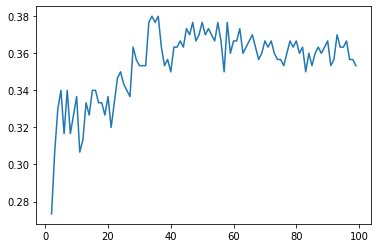

In [101]:
sns.lineplot(x  = Ks, y = Scores)